# EDA con visualización de datos 📊

<strong>Objetivos:</strong>
+ Realizar análisis exploratorio de datos.
+ Realizar ingeniería de características utilizando Pandas y Matplotlib.

---

## Importar librerías y cargar datos

In [3]:
# Importar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import get_dummies

# Para ignorar Warnings.
import warnings
warnings.filterwarnings('ignore')

## EDA

Primero, cargar el dataset de Space X como un DataFrame de Pandas e imprimir las primeras filas.

In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')
''' 
o cargar dataset obtenido en el tercer cuaderno.
df = pd.read_csv('./datasets/dataset_part_3.csv')
df.head(10)
'''
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Hay que intentar dislucidar cómo la variable <code>FlightNumber</code> (que indica el número de vuelos) y la variable <code>PayloadMass</code> (que indica la masa de carga útil) afectan el resultado del lanzamiento.

Se puede trazar <code>FlightNumber</code> vs. <code>PayloadMass</code> y superponer el resultado del lanzamiento. Se puede ver que a medida que aumenta el número de vuelos, es más probable que la primera etapa aterrice con éxito. La masa de carga útil también es importante, parece que cuanto más grande es la carga útil, menos probable es que aterrice la primera etapa.

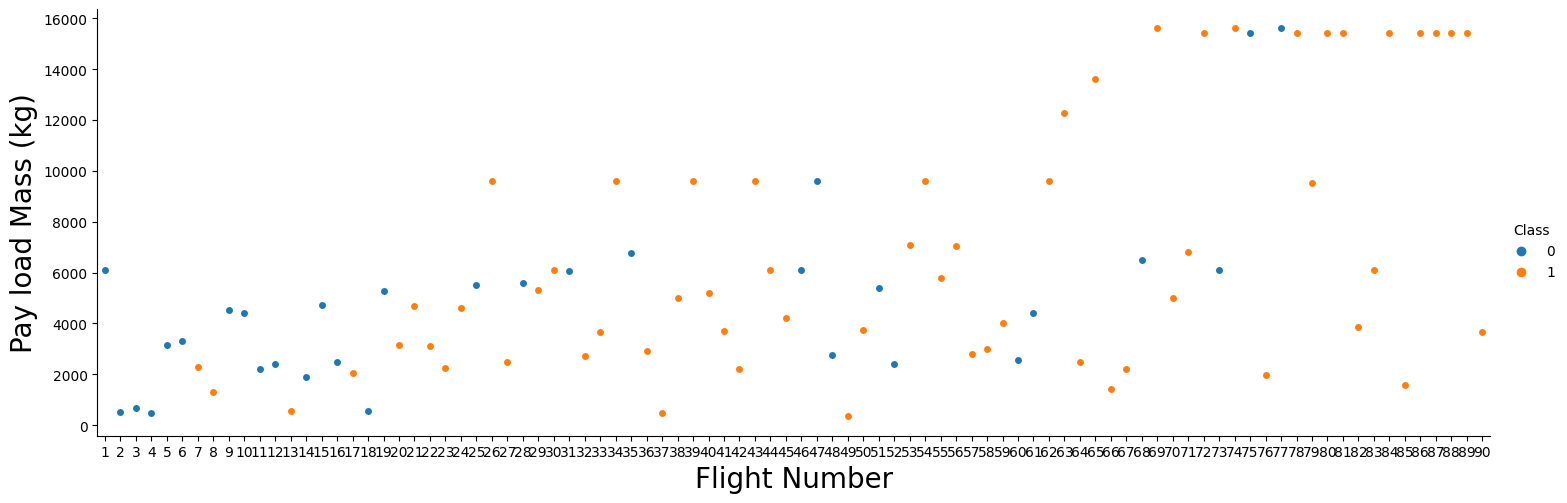

In [5]:
# Graficar.
sns.catplot(
    y = 'PayloadMass',
    x = 'FlightNumber',
    hue = 'Class',
    data = df, 
    aspect = 3
    )
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Pay load Mass (kg)', fontsize=20)
plt.show()

<strong>Naranja:</strong> Lanzamientos exitosos - aterrizajes exitosos<br>
<strong>Azul:</strong> Lanzamientos fallidos - aterrizajes fallidos

También resulta que diferentes sitios de lanzamiento tienen diferentes tasas de éxito. <code>CCAFS LC-40</code> tiene una tasa de éxito del 60%, mientras que <code>KSC LC-39A</code> y <code>AFB SLC 4E</code> tienen una tasa de éxito del 77%.

### Tareas

#### Tarea 1: Visualizar la relación entre el número de vuelos y el sitio de lanzamiento

Usar la función <code>catplot()</code> para graficar <code>FlightNumber</code> vs. <code>LaunchSite</code>. Configurar el parámetro <code>x</code> en <code>FlightNumber</code>, y el parámetro <code>y</code> en <code>LaunchSite</code>. También configurar el parámetro <code>hue</code> con la variable <code>Class</code>.

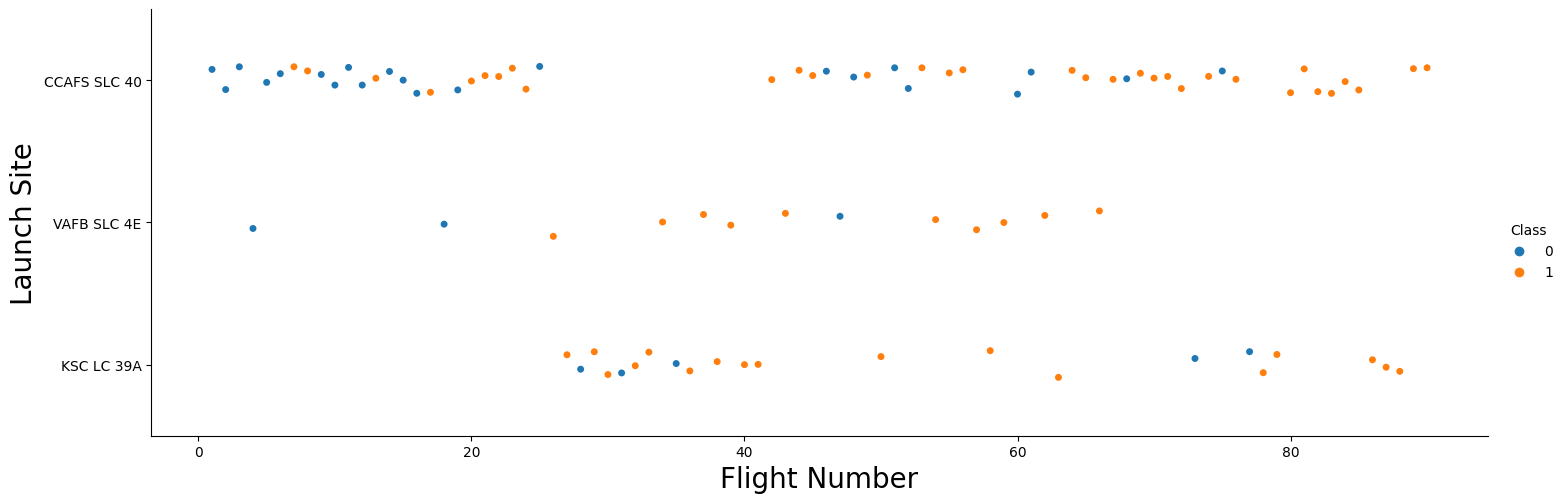

In [6]:
# Gráfico de dispersión.
sns.catplot(
    x = 'FlightNumber',
    y = 'LaunchSite',
    hue = 'Class',
    data = df,
    aspect = 3
    )
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

El gráfico anterior proporciona una visualización de cómo el número de vuelos está relacionado con los sitios de lanzamiento y cómo esta relación varía según si el lanzamiento fue exitoso o no (si la primera etapa logró aterrizar con éxito o no).

<strong>Interpretación:</strong> El gráfico sugiere que hay un aumento en la tasa de éxito a lo largo del tiempo, y que el sitio de lanzamiento CCAFS SLC 40 
contiene la mayor cantidad de vuelos. También vale la pena considerar el vuelo nro. 20, ya que parece ser que a partir de este es cuando
la tasa de éxito comienza a aumentar para todos los sitios de lanzamiento.

#### Tarea 2: Visualizar la relación entre la masa de carga útil y el sitio de lanzamiento

Usar la función <code>catplot()</code> para graficar <code>PayloadMass</code> vs. <code>LaunchSite</code>. Configurar el parámetro <code>x</code> en <code>PayloadMass</code>, y el parámetro <code>y</code> en <code>LaunchSite</code>. También configurar el parámetro <code>hue</code> con la variable <code>Class</code>.

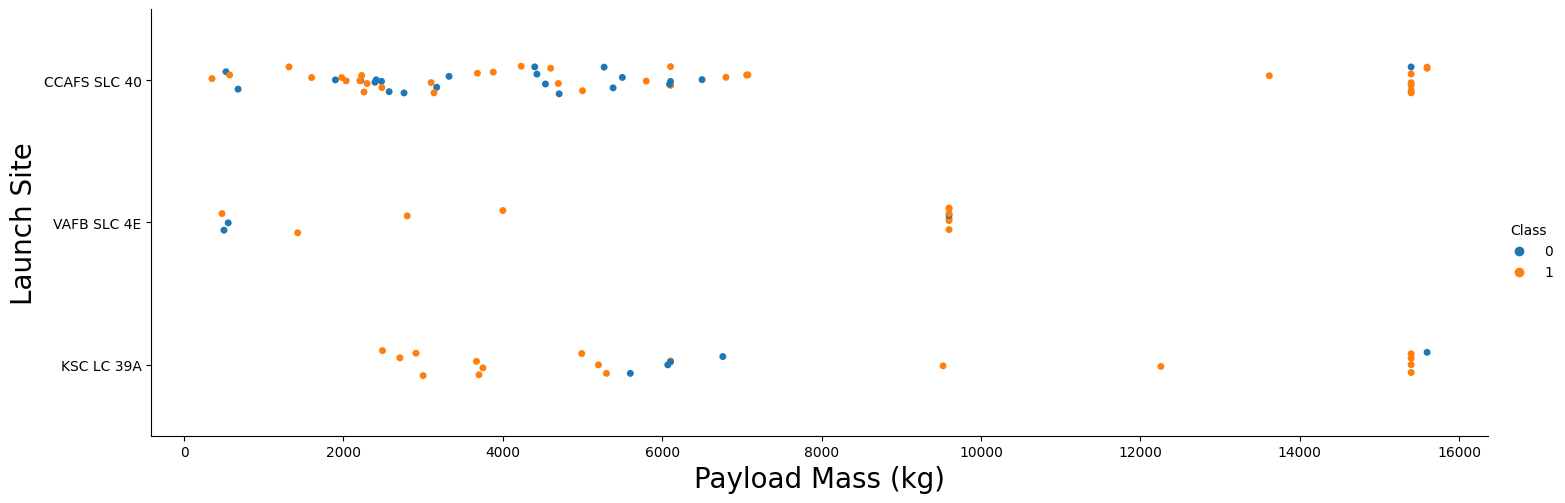

In [7]:
# Gráfico de dispersión.
sns.catplot(
    x = 'PayloadMass',
    y = 'LaunchSite',
    hue = 'Class',
    data = df,
    aspect = 3
    )
plt.xlabel('Payload Mass (kg)', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

<strong>Interpretación:</strong> El gráfico sugiere que la masa de carga útil suele estar entre 0-6000 kg., y que cada sitio de lanzamiento suele manejar distintos rangos de kg. de carga. Además, para el sitio VAFB SLC 4E no se lanzan cohetes con una masa de carga pesada (superior a 10000).

#### Tarea 3: Visualizar la relación entre la tasa de éxito y el tipo de órbita

Se requiere verificar visualmente si existe alguna relación entre la tasa de éxito y el tipo de órbita.<br>
Crear un gráfico de barras para la tasa de éxito de cada órbita.

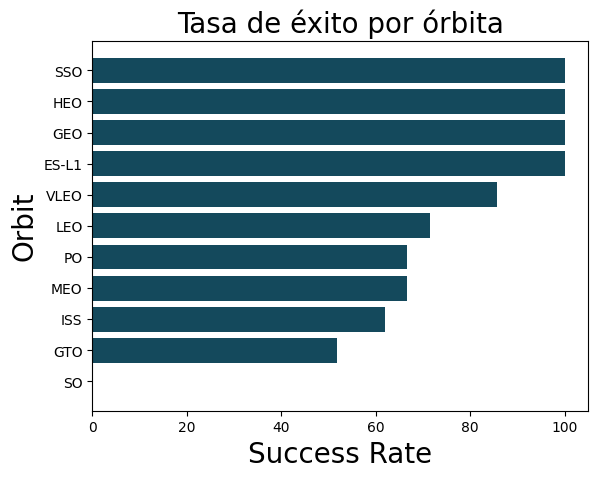

In [8]:
# Ayuda: usar groupby con la columna Orbit y obtener la media de la columna Class.
orbit_success_rates = df.groupby('Orbit').mean()['Class'].reset_index().sort_values(['Class'], ascending=True)

# Gráfico de barras.
fig, ax = plt.subplots()
ax.barh(orbit_success_rates.Orbit, orbit_success_rates.Class * 100, color='#14495C')

# Título y etiquetas.
plt.title('Tasa de éxito por órbita', fontsize=20)
plt.xlabel('Success Rate', fontsize=20)
plt.ylabel('Orbit', fontsize=20)

# Mostrar.
plt.show()

<strong>Interpretación:</strong> El gráfico sugiere que SSO, HEO, GEO Y ES-L1 tienen una tasa de éxito del 100%, mientras que el resto de órbitas se encuentran en un rango de éxito entre el 40 y el 80% aprox. Sin embargo, hay una excepción: la órbita SO, que tiene una tasa de éxito del 0%, es decir, nula.

#### Tarea 4: Visualizar la relación entre el número de vuelos y el tipo de órbita

Se requiere verificar visualmente si existe alguna relación entre el número de vuelos y el tipo de órbita.<br>
Crear un gráfico de dispersión para el número de vuelos de cada órbita.

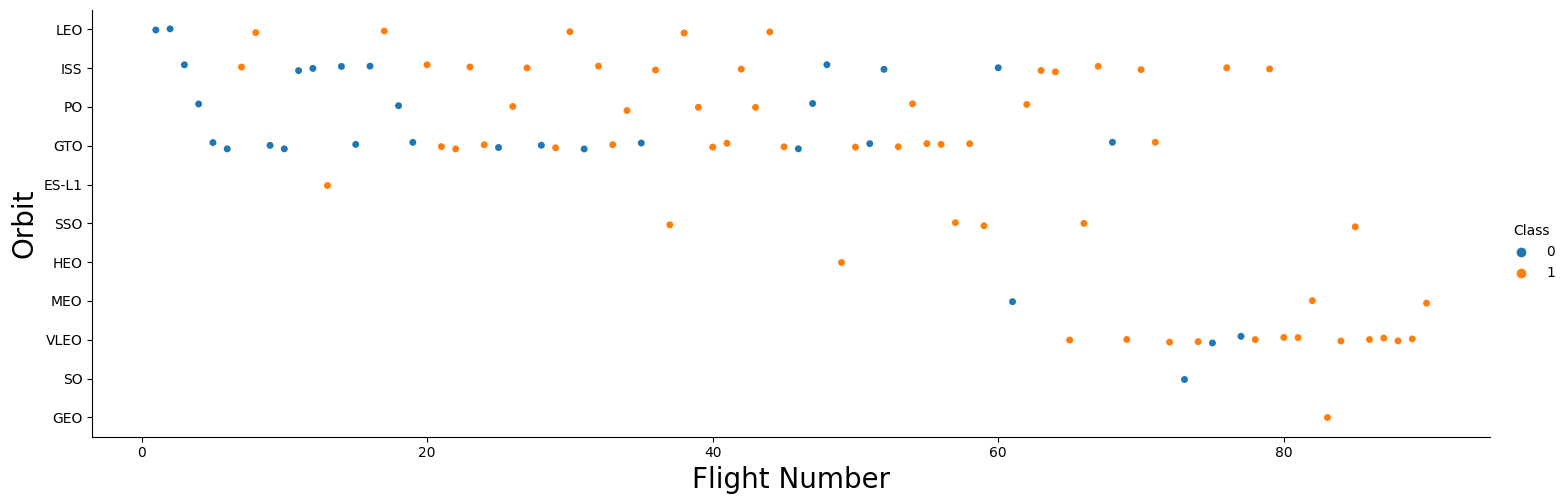

In [9]:
sns.catplot(
    x = 'FlightNumber',
    y = 'Orbit',
    hue = 'Class',
    data = df,
    aspect = 3
    )
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.show()

<strong>Interpretación:</strong> El gráfico sugiere que en la órbita LEO es donde más se dan lanzamientos éxitosos en relación al número de vuelos.

#### Tarea 5: Visualizar la relación entre la carga útil y el tipo de órbita

Se requiere verificar visualmente si existe alguna relación entre el la carga útil y el tipo de órbita.<br>
Crear un gráfico de dispersión para la carga de cada órbita.

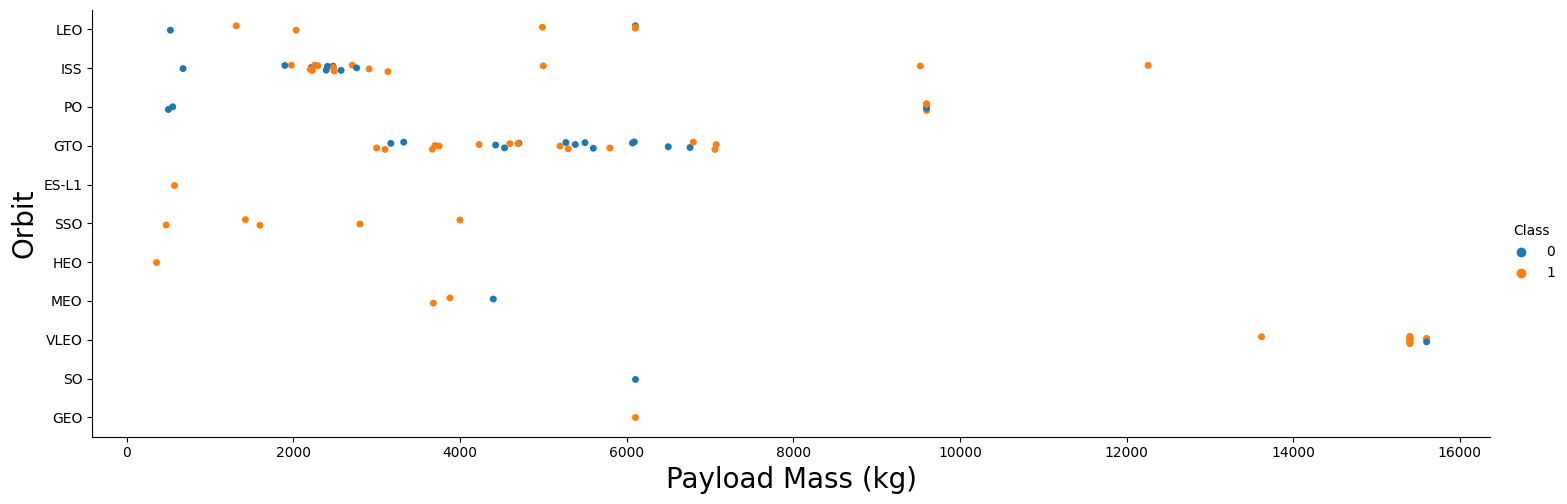

In [10]:
sns.catplot(
    x = 'PayloadMass',
    y = 'Orbit',
    hue = 'Class',
    data = df,
    aspect = 3
    )
plt.xlabel('Payload Mass (kg)', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.show()

<strong>Interpretación:</strong> El gráfico sugiere que, con cargas pesadas, los lanzamientos éxitosos influencian más a PO, LEO e ISS. Para GTO no se distingue bien, ya que tanto la tasa de aterrizaje positiva como la negativa estan presentes. Sin embargo, La órbita más exitosa en relación a la carga es VLEO, que tiene valores positivos hasta pasando los 14000 kg.

#### Tarea 6: Visualizar la tasa de lanzamientos exitosos por año 

Para esto, se puede trazar un gráfico de línea con el eje <code>x</code> con el año y el eje <code>y</code> con la tasa de éxito promedio.

In [11]:
# Esta función de ayuda extrae el año de una fecha pasada como parámetro. 
year = []
def Extract_year(date):
    for i in df['Date']:
        year.append(i.split('-')[0])
    return year

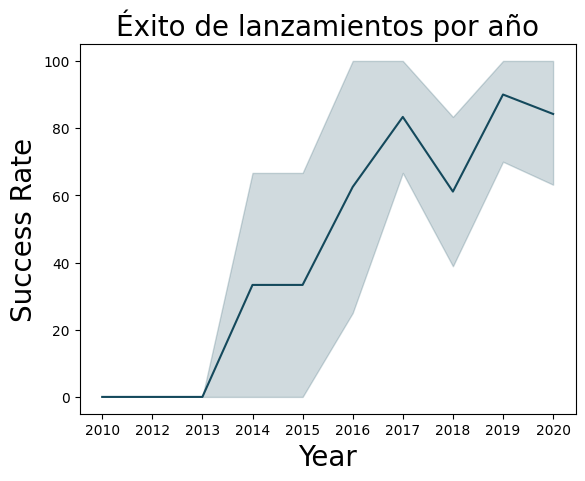

In [12]:
# Graficar.
df['year'] = Extract_year(year)
df['Success Rate'] = df['Class'] * 100
sns.lineplot(data=df, x='year', y='Success Rate', color='#14495C')

# Añadir título y etiquetas.
plt.title('Éxito de lanzamientos por año', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Success Rate', fontsize=20)

# Mostrar.
plt.show()

<strong>Interpretación:</strong> El gráfico sugiere que la tasa de éxito comenzó a aumentar a partir del año 2013, y que de ahi en adelante el éxito de los lanzamientos cubre más o menos un 80% en un periodo de 10 años.

### Ingeniería de características

Llegado a este punto, ya se deben tener algunas ideas preliminares sobre cómo cada variable importante influenciaría la tasa de éxito. Seleccionar las caractrísticas que se utilizarán en la sección de análisis predictivo.

In [13]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


#### Tarea 7: Aplicar One-Hot a las columnas multicategóricas

Utilizar la función <code>get_dummies()</code> en el DataFrame de características para aplicar OneHotEncoder a las columnas <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code> y <code>Serial</code>. Asignar el resultado a la variable <code>features_one_hot</code>, y mostrar las primeras filas usando el método <code>head()</code>. El DataFrame resultante debe incluir todas las características, incluidas las codificadas.

In [14]:
# Ayuda: Usar get_dummies() sobre las columnas categóricas.

# Importar la función.
#from pandas import get_dummies

# Aplicar la codificación One-hot sobre las columnas 'Orbit', 'LaunchSite', 'LandingPad' y 'Serial'.
features_one_hot = get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Mostrar las primeras filas de los datos codificados One-hot.
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Tarea 8: Convertir todas las columnas numéricas a float64

Ahora que el DataFrame de características <code>features_one_hot</code> solo contiene números, convertir las variables a tipo <code>float64</code>.

In [15]:
# Ayuda: Usar la función astype.
features_one_hot = features_one_hot.astype('float64')

Por último, exportar el dataset a un CSV para la siguiente sección.

In [16]:
features_one_hot.to_csv('../datasets/dataset_part_4.csv', index=False)

> **NOTA:**
Para que las respuestas sean consistentes en caso de que que hayan dificultades, los siguientes archivos utilizarán un dataset proporcionado para que cada cuaderno sea independiente.

## Resumen

El desarrollo de este cuaderno puede resumirse en los siguientes puntos:

+ El primer paso fue Importar las librerías y cargar los datos necesarios.
+ Luego tuvo lugar el análisis y la visualización de datos para explorar las relaciones entre las variables del dataset en relación a los resultados de lanzamiento, que se representan con un 0 si han fracasado y con un 1 si han tenido éxito.
+ Del ejercicio anterior se obtuvieron nociones sobre las variables que mayor influencia tienen sobre la tasa de éxito de un lanzamiento. Se creó entonces un DataFrame de características (llamado <code>features</code>) con estas variables, que servirá para el modelo predictivo que tendrá lugar en otras secciones.
+ Se utilizó la función <code>get_dummies()</code> en el DataFrame <code>features</code> para aplicar la codificación <code>One-Hot</code> (técnica para convertir variables multiategóricas a numéricas) a las columnas <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code> y <code>Serial</code>. Se asignó el resultado a la variable <code>features_one_hot</code>: el DataFrame final que incluye todas las variables, incluidas las que se codificaron por One-Hot.
+ Una vez que todas las variables de el dataset fueron numéricas, se las convirtió al tipo de dato <code>float64</code>, que resulta más apropiado.
+ Finalmente, importé el dataset final como un archivo CSV para usarlo en la siguiente sección.

---